<h1>Netflix Data Analytics Project (By David Hutchings)<h1>
    <h2>Questions to examine:<h2>
        <p>1. Is Netflix focusing more on TV shows than movies in recent years?<p>
        <p>2. Has the length of movies added to Netflix decreased over time?<p>
        <p>3. How many seasons do Netflix TV shows usually run?<p>
        <p>4. Which countries are most represented on Netflix?<p>
        <p>5. What are the most popular genres on Netflix?<p>
        <p>6. Who are the top 10 American directors on Netflix?<p>
        <p>7. Who are the top 10 most featured actors in American movies?<p>
        

In [618]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
import seaborn as sns
from scipy import stats
from statistics import mean,median
%matplotlib inline
plt.style.use('ggplot')

In [117]:
# Reading in CSV file and converting date_added column to type datetime
df = pd.read_csv('/Users/Dhutchings/Downloads/netflix_titles_nov_2019.csv',parse_dates=['date_added'])

In [628]:
df.head(1)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,year_added
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,2019-11-30,2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019.0


In [119]:
# Separating year from date_added into its own column year_added
df['year_added'] = df['date_added'].dt.year

In [370]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 13 columns):
show_id         5837 non-null int64
title           5837 non-null object
director        3936 non-null object
cast            5281 non-null object
country         5410 non-null object
date_added      5195 non-null datetime64[ns]
release_year    5837 non-null int64
rating          5827 non-null object
duration        5837 non-null object
listed_in       5837 non-null object
description     5837 non-null object
type            5837 non-null object
year_added      5195 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 592.9+ KB


In [443]:
# Checking out the number of null rows by column
print("Count of null values by Column:")
print(df.isnull().sum())

Count of null values by Column:
show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
year_added       642
dtype: int64


<h2>Question 1<h2>
    <p>Is Netflix focusing more on TV shows than movies in recent years?<p>

[Text(0.5, 1.0, '2019 TV vs. Movie Production')]

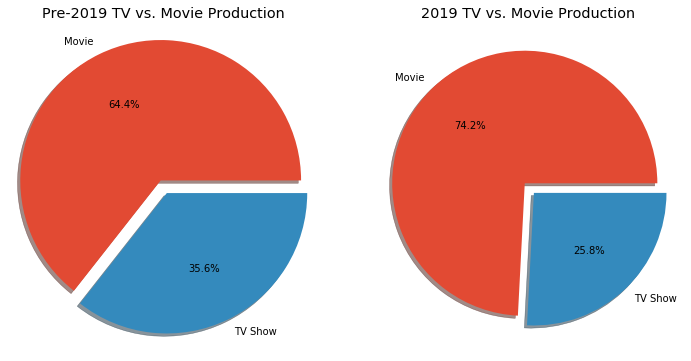

In [631]:
# Plotting TV vs. Movie Production from 2008-2019 and TV vs. Movie Production in 2019
labels = ['Movie','TV Show']
sizes = [df.type[(df['type']=='Movie')&(df['year_added']!=2019)].count(), df.type[(df['type']=='TV Show')&(df['year_added']!=2019)].count()]
explode = (0,0.1)
sizes_2019 = [df.type[(df['type']=='Movie') & (df['year_added']==2019)].count(), df.type[(df['type']=='TV Show') & (df['year_added']==2019)].count()]

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(12,6))

ax1.pie(sizes,labels=labels,shadow=True,autopct='%1.1f%%',explode=explode)
ax1.axis('equal')
ax1.set(title='Pre-2019 TV vs. Movie Production')

ax2.pie(sizes_2019,labels=labels,shadow=True,autopct='%1.1f%%',explode=explode)
ax2.axis('equal')
ax2.set(title='2019 TV vs. Movie Production')

In [184]:
# Creating tv and movie dataframes that have type and year_added columns
tv = df[df['type']=='TV Show'].loc[:,['type','year_added']]
movie = df[df['type']=='Movie'].loc[:,['type','year_added']]

In [191]:
# Removing rows with null values in tv and movie dataframes
tv.dropna(inplace=True)
movie.dropna(inplace=True)

In [199]:
# Creating new dataframe that groups by year and counts the number of movies or tv shows added in that year
tv_by_year = sqldf("SELECT year_added,COUNT(type) AS num_added FROM tv GROUP BY year_added")
movie_by_year = sqldf("SELECT year_added,COUNT(type) AS num_added FROM movie GROUP BY year_added")

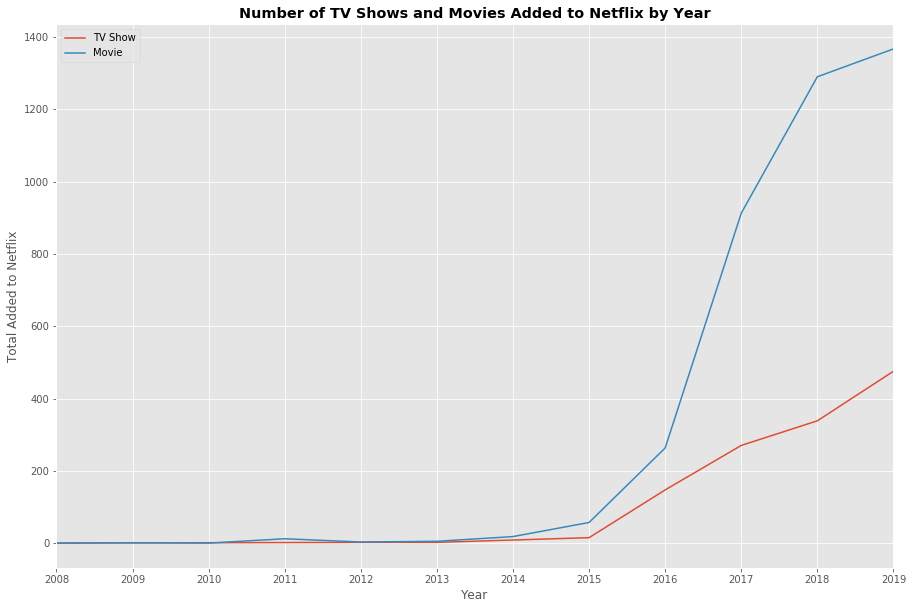

In [445]:
# Graph of number of tv shows and movies added to netflix by year
fig, ax = plt.subplots(figsize=(15,10))

tv_by_year.plot(kind='line',x='year_added',y='num_added',ax=ax, label='TV Show')
movie_by_year.plot(kind='line',x='year_added',y='num_added',ax=ax, label = 'Movie')

ax.set(xlabel='Year',ylabel='Total Added to Netflix')
ax.set_title('Number of TV Shows and Movies Added to Netflix by Year',fontweight='bold')
ax.xaxis.set_ticks(np.arange(2008, 2020, 1))

<p>Q1 Analysis: It turns out that Netflix has been focusing on Movies more in recent years and the margin between Movies and TV shows added is growing every year.<p>

<h2>Question 2<h2>
    <p>Has the length of movies added to Netflix decreased over time?<p>

In [603]:
# Creating two DataFrames that filter such that type='Movie' and year_added is between 2018 and 2019 or every year besides 2018 and 2019
movie_dur_2018_2019 = sqldf("SELECT duration FROM df WHERE type='Movie' AND year_added BETWEEN 2018 AND 2019")
movie_dur_2008_2017 = sqldf("SELECT duration FROM df WHERE type='Movie' AND year_added NOT BETWEEN 2018 AND 2019")

In [605]:
# Converting duration column to integer value
movie_dur_2018_2019 = movie_dur_2018_2019.duration.apply(lambda x: int(x.split()[0]))
movie_dur_2008_2017 = movie_dur_2008_2017.duration.apply(lambda x: int(x.split()[0]))

Text(0.5, 1.0, 'Histogram of Movie Durations (2008-2017 vs. 2018-2019)')

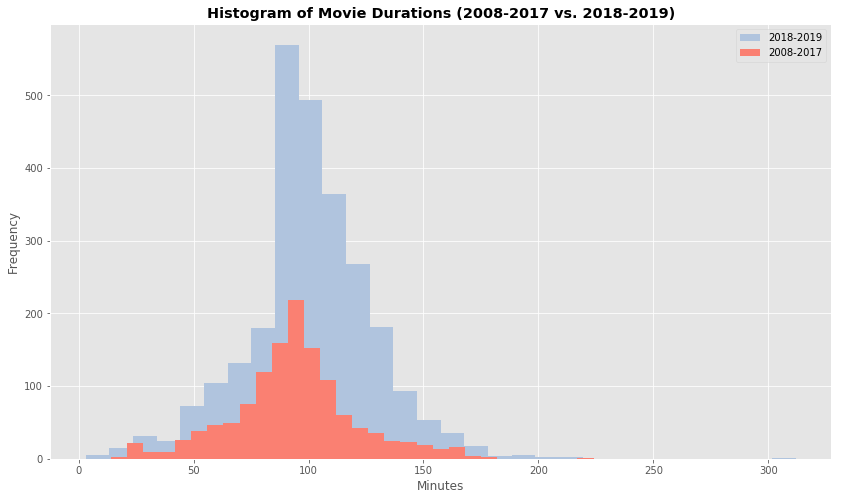

In [627]:
# Graph of Histogram of Movie Durations
fig, ax = plt.subplots(figsize=(14,8))

movie_dur_2018_2019.plot(kind='hist',bins=30,color='lightsteelblue', ax=ax,legend=True,label='2018-2019')
movie_dur_2008_2017.plot(kind='hist',bins=30,color='salmon', ax=ax,legend=True,label='2008-2017')

ax.set(xlabel="Minutes")
ax.set_title('Histogram of Movie Durations (2008-2017 vs. 2018-2019)',fontweight='bold')

In [633]:
# Creating lists of movie durations in minutes from both periods of time
a = list(movie_dur_2008_2017)
b = list(movie_dur_2018_2019)
print('2008-2017 mean: ' + str(mean(a)) + ' mins')
print('2008-2017 median: ' + str(median(a)) + ' mins')
print('...')
print('2018-2019 mean: ' + str(mean(b)) + ' mins')
print('2018-2019 median: ' + str(median(b)) + ' mins')

2008-2017 mean: 93.26541764246683 mins
2008-2017 median: 93 mins
...
2018-2019 mean: 100.34023334587881 mins
2018-2019 median: 99 mins


In [634]:
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-7.557717668327585, pvalue=5.072708736457111e-14)

<p>Q2 Analysis: My initial hypothesis when approaching this question was that movie lengths would have decreased in the past 2 years due to decreasing attention spans. However, my findings showed the opposite. Movies added in 2018 and 2019 were actually longer (t=-7.5577, p=5.07e-14 less than 0.05).<p>

<h2>Question 3<h2>
    <p>How many seasons do Netflix TV shows usually run?<p>

In [234]:
# Creating a dataframe of tv shows with column 'duration'
tv_duration = df[df['type']=='TV Show'].loc[:,'duration']

In [236]:
# Converting duration column into an integer representation
tv_duration = tv_duration.apply(lambda x: int(x.split()[0]))

Text(0.5, 1.0, 'TV Show Durations')

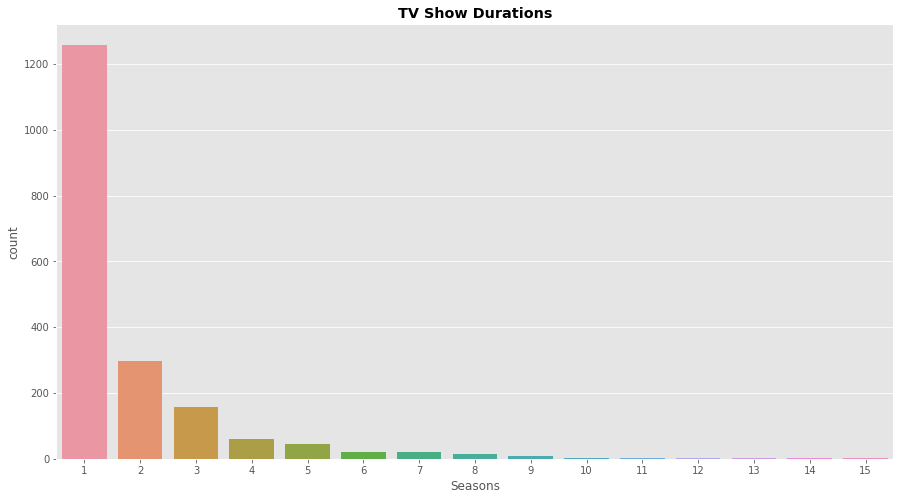

In [439]:
# Graph of TV show durations measured by the number of seasons available on Netflix
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(tv_duration,ax=ax)

ax.set(xlabel='Seasons')
ax.set_title('TV Show Durations',fontweight='bold')

<p>Q3 Analysis: The results show that a majority of TV Shows last only 1 season. This isn't surprising given that it is rare that a TV show is good enough to be extended for multiple seasons.<p>

<h2>Question 4<h2>
    <p>Which countries are most represented on Netflix?<p>

In [281]:
# Creating DataFrame of top 10 most frequent countries and how often they appear in the data set
countries = pd.DataFrame(df.country.value_counts().head(10))

In [285]:
# Renaming column 'country' to 'count'
countries.rename(columns={"country": "count"},inplace=True)

Text(0.5, 1.0, 'Top 10 Countries Represented on Netflix 2008-2019')

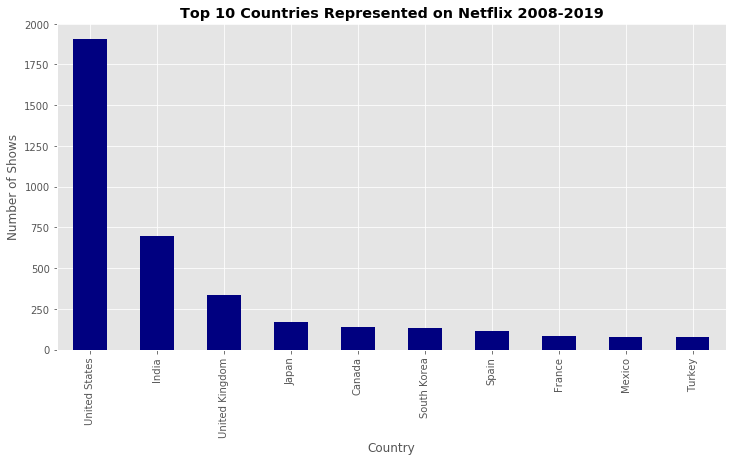

In [429]:
# Graph of top 10 countries on Netflix
fig, ax = plt.subplots(figsize=(12,6))

countries.plot(kind='bar',ax=ax,color='navy',legend=False)

ax.set(xlabel='Country',ylabel='Number of Shows')
ax.set_title('Top 10 Countries Represented on Netflix 2008-2019',fontweight='bold')

<h2>Question 5<h2>
    <p>What are the most popular genres on Netflix?<p>

In [499]:
# Creating list of all genres in data set
genre_list = []
for item in df['listed_in']:
    genre_list.extend(item.split(', '))

In [500]:
# Converting list into dictionary with key:genre  value:count of times genre appeared in list
genre_dict = dict((i, genre_list.count(i)) for i in genre_list)

In [501]:
# Creating DataFrame genres with columns 'Genre' and 'Count'
genre_names = list(genre_dict.keys())
genre_value = [value for name,value in genre_dict.items()]
genres = pd.DataFrame({'Genre':genre_names, 'Count':genre_value})

In [502]:
# Ordering genres DataFrame by Count descending and querrying the top ten results
genres = sqldf("SELECT * FROM genres ORDER BY Count DESC LIMIT 10")

Text(0.5, 1.0, '10 Most Popular Netflix Genres')

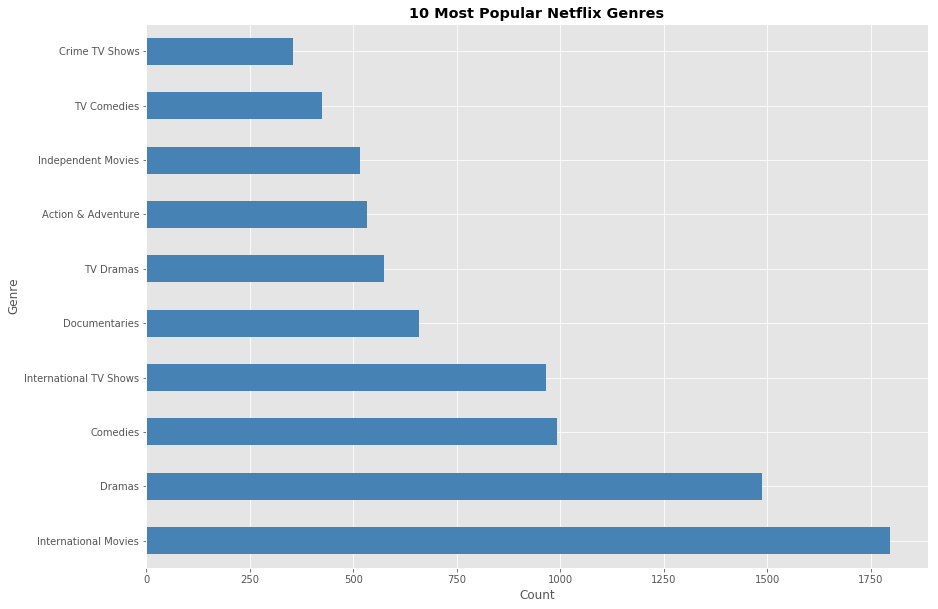

In [503]:
# Plotting the top ten most popular netflix genres
fig, ax = plt.subplots(figsize=(14,10))

genres.plot(kind='barh',x='Genre',y='Count',color="steelblue",ax=ax,legend=False)

ax.set(ylabel='Genre',xlabel='Count')
ax.set_title('10 Most Popular Netflix Genres',fontweight='bold')

<h2>Question 6<h2>
    <p>Who are the top 10 American directors on Netflix?<p>

In [388]:
# Creating DataFrame american_directors with column 'director' filtered by country='United States'
american_directors = sqldf("SELECT director FROM df WHERE country='United States'")

In [390]:
# Dropping null rows from DataFrame
american_directors.dropna(inplace=True)

In [392]:
# Creating list of all directors in data set
directors = []
for item in american_directors['director']:
    directors.extend(item.split(', '))

In [394]:
# Converting list to dictionary where key:director name and value: count of times name appears in list
directors_dict = dict((i, directors.count(i)) for i in directors)

In [504]:
# Creating DataFrame with columns 'director_names' and 'director_value'
director_names = [name for name in directors_dict.keys()]
director_value = [value for name,value in directors_dict.items()]
directors_df = pd.DataFrame({'Name':director_names, 'Count':director_value})

In [505]:
# Ordering DataFrame by 'Value' descending and grabbing top ten directors 
directors_df = sqldf("SELECT * FROM directors_df ORDER BY Count DESC LIMIT 10")

Text(0.5, 1.0, 'Top 10 American Directors on Netflix')

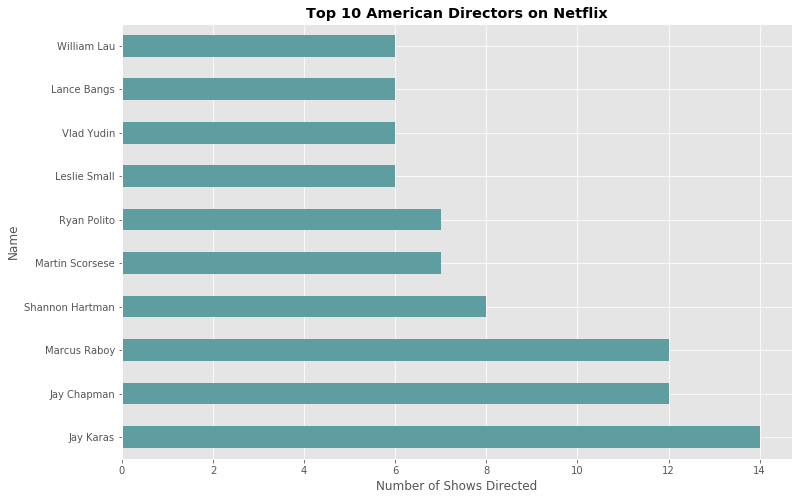

In [507]:
# Plotting the top 10 american directors based on number of shows directed
fig, ax = plt.subplots(figsize=(12,8))
directors_df.plot(kind='barh',x='Name',y='Count',color="cadetblue",ax=ax,legend=False)
ax.set(ylabel='Name',xlabel='Number of Shows Directed')
ax.set_title(fontweight='bold',label='Top 10 American Directors on Netflix')

<h2>Question 7<h2>
    <p>Who are the top 10 most featured actors in American movies on Netflix?<p>

In [523]:
# Creating DataFrame american_actors with column 'actor' filtered by country='United States'
american_actors = df.cast[df['country']=='United States']

In [525]:
# Dropping null rows from DataFrame
american_actors.dropna(inplace=True)

In [531]:
# Creating list of american actors
actors = []
for item in american_actors:
    actors.extend(item.split(', '))

In [533]:
# Converting list to dictionary where key:actor name and value:count of times name appears in list
actors_dict = dict((i, actors.count(i)) for i in actors)

In [534]:
# Creating DataFrame with columns 'actor_names' and 'actor_value'
actor_names = [name for name in actors_dict.keys()]
actor_value = [value for name,value in actors_dict.items()]
actor_df = pd.DataFrame({'Name':actor_names, 'Count':actor_value})

In [535]:
# Ordering DataFrame by 'Value' descending and grabbing top ten actors 
actor_df = sqldf("SELECT * FROM actor_df ORDER BY Count DESC LIMIT 10")

Text(0.5, 1.0, 'Top 10 American Actors on Netflix')

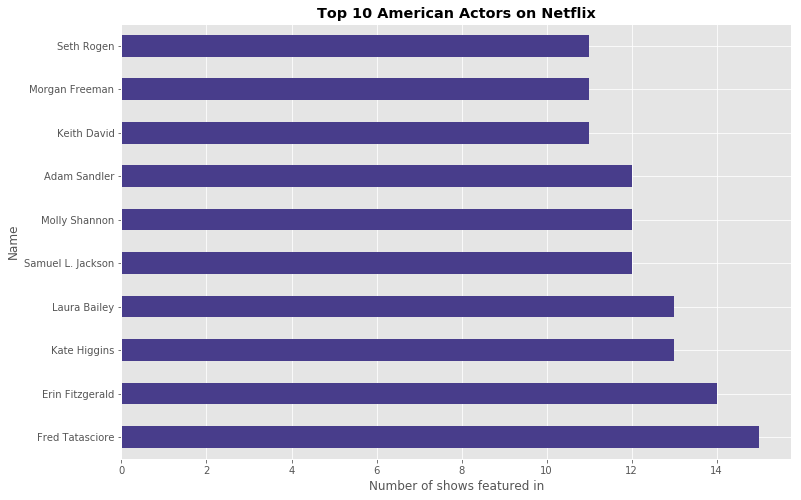

In [539]:
# Plotting the top 10 american actors based on number of shows featured in
fig, ax = plt.subplots(figsize=(12,8))
actor_df.plot(kind='barh',x='Name',y='Count',color="darkslateblue",ax=ax,legend=False)
ax.set(ylabel='Name',xlabel='Number of shows featured in')
ax.set_title(fontweight='bold',label='Top 10 American Actors on Netflix')